1.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('auto.csv', na_values='?')

In [5]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


b)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024BC8AECC50>,
      dtype=object)

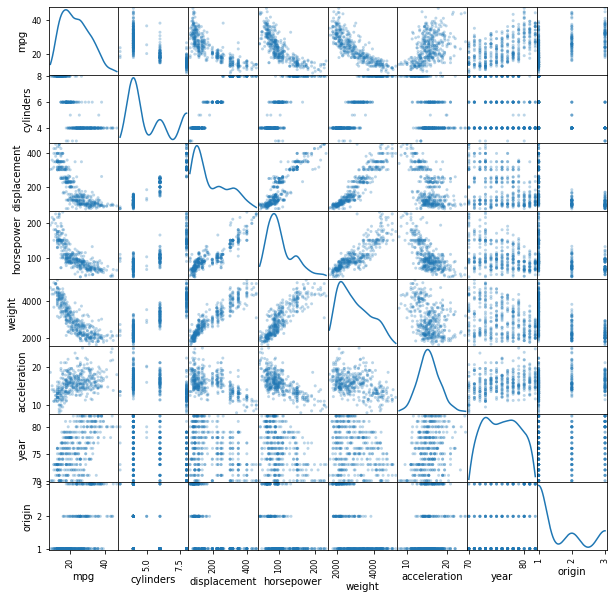

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.3, figsize=(10, 10), diagonal='kde')

c)

In [10]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


d)

In [32]:
import statsmodels.api as sm
df = data.iloc[:, :-2]

In [33]:
df['const'] = 1
reg1 = sm.OLS(endog=df['mpg'], exog=df[list(df.columns[1:])].astype(float), missing='drop')

In [37]:
res1 = reg1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):          2.04e-139
Time:                        17:50:42   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.4934      0.323     -1.526   

i. coefficients significant at 1\% level:
$\it{displacement, weight, year, origin, const}$

ii. coefficients not significant at 10\% level:
$\it{cylinders, horsepower, acceleration}$

iii.
Based on the OLS estimation, each additional vehicle year is expected to increase miles per gallon by about 0.75.

e)
The scatterplot matrix seems to imply that $\it{displacement}$, $\it{horsepower}$ and $\it{weight}$ have nonlinear relationship with $\it{mpg}$.

i.


In [46]:
df = data.iloc[:, :-2]
df['dis_sq'] = df['displacement'] ** 2
df['hor_sq'] = df['horsepower'] ** 2
df['wei_sq'] = df['weight'] ** 2
df['acc_sq'] = df['acceleration'] ** 2

In [47]:
df['const'] = 1
reg2 = sm.OLS(endog=df['mpg'], exog=df[list(df.columns[1:])].astype(float), missing='drop')

In [51]:
res2 = reg2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):          1.75e-160
Time:                        18:08:46   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders        0.2519      0.326      0.773   

ii.
The adjusted R-squared of the new regression including squared terms is 0.866, better when compared to the original regression's 0.818.

iii.
The statistical significance of $\it{displacement}$ and its squared term are both insignificant in this regression, whereas in the previous one without the squared term, it was significant.

iv.
The $\it{cylinders}$ variable continues to be insignifcant, with a even larger p-value.

f)

In [55]:
p_input = [6, 200, 100, 3100, 15.1, 1999, 1, 200 ** 2, 100 ** 2, 3100 ** 2, 15.1 ** 2, 1]
res2.predict(exog=p_input)

array([1522.55457064])

2.

a)
distance:
3, 2, $\sqrt{10}$, $\sqrt{5}$, $\sqrt{2}$, $\sqrt{3}$

b)$K=1$

$Pr(Y=j|X=X_{0})=\frac{1}{1} \cdot Green=Green$
The one closest observation is Green.

c)$K=1$

$Pr(Y=j|X=X_{0})=\frac{1}{3} \cdot Green+\frac{1}{3} \cdot Red+\frac{1}{3} \cdot Red$
The three closest observations are obs 2, 5 and 6, two of which are Red, leading to a prediction of Red.

d)

If the Bayes decision boundary is highly nonlinear, given the small observation size, the best value for K should be small to avoid overfitting.

e)

In [8]:
names = ['x1', 'x2', 'x3', 'y']
data = [[0, 3, 0, 'Red'], [2, 0, 0, 'Red'], [0, 1, 3, 'Red'], [0, 1, 2, 'Green'], [-1, 0, 1, 'Green'], [1, 1, 1, 'Red']]
df = pd.DataFrame(data)
df.columns = names

In [9]:
df

,x1,x2,x3,y
0,0,3,0,Red
1,2,0,0,Red
2,0,1,3,Red
3,0,1,2,Green
4,-1,0,1,Green
5,1,1,1,Red


In [15]:
from sklearn import neighbors, linear_model
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(df.iloc[:, 0:3])
y = np.array(df['y'])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#probably no need to split such a small data

knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)
test_pt = [1, 1, 1]
pred = knn.predict(X_test)

print(pred)


['Red' 'Red']


We can see the prediction result is Red.

3.

In [28]:
from statistics import median

data = pd.read_csv('auto.csv', na_values='?')
data = data.iloc[:, :-1]
mpg_med = median(data['mpg'])

data['mpg_high'] = data['mpg'] >= mpg_med
data = data.replace(True, 1)
data = data.replace(False, 0)

In [29]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,18.0,8,307.0,130.0,3504,12.0,70,1,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0.0
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,1.0
393,44.0,4,97.0,52.0,2130,24.6,82,2,1.0
394,32.0,4,135.0,84.0,2295,11.6,82,1,1.0
395,28.0,4,120.0,79.0,2625,18.6,82,1,1.0


a)

In [37]:
import statsmodels.api as sm

data = data.dropna()
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

num_obs = X.shape[0]
const_vec = np.ones(num_obs).reshape((num_obs, 1))
XplusConst = np.hstack((const_vec, X))

LogitModel = sm.Logit(y, XplusConst)
LogitReg_sm = LogitModel.fit()
LogitReg_sm.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Tue, 18 Feb 2020   Pseudo R-squ.:                  0.7101
Time:                        20:39:40   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
Covariance Type:            nonrobust   LLR p-value:                 2.531e-79
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.1549      5.764     -2.976      0.003     -28.452      -5.858
x1            -0.1626      0.423     -0.384      0.701      -0.992       0.667
x2             0.0021      0.012      0.174      0.862      -0.021       0.026
x3            -0.0410      0.024     -1.718      0.086      -0.088       0.006
x4            -0.0043      0.001     -3.784      0.000      -0.007      -0.002
x5             0.0161      0.141      0.114      0.910      -0.261       0.293
x6             0.4295      0.075      5.709      0.000       0.282       0.577
x7             0.4773      0.362      1.319      0.187      -0.232       1.187
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Regressors with significant coefficients 5\% s level:

$\it{constant, weight, year}$

b)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

c)

In [58]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(C=1e8)
LogReg.fit(X_train, y_train)
print(LogReg.intercept_)
print(LogReg.coef_)

[-0.10467119]
[[-1.10856106  0.00962737 -0.05166391 -0.0048027  -0.20602195  0.34565805
  -0.30037209]]


c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


d)

In [59]:
y_pred = LogReg.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [11, 86]], dtype=int64)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88        99
         1.0       0.87      0.89      0.88        97

    accuracy                           0.88       196
   macro avg       0.88      0.88      0.88       196
weighted avg       0.88      0.88      0.88       196



The model yields 99 correct predictions and 97 incorrect predictions. Frankly, it does not preditc $\it{mpg_high}$ better than random guess.